# Chess Puzzles Data Analysis

### Finding the data

I started my search from the [Dataset Finder](https://dataset-finder.netlify.app/) which showed me to Lichess's open database on [database.lichess.org](https://database.lichess.org). I have downloaded the .csv present on https://database.lichess.org/#puzzles into the root of this .ipynb file.

Required installations

In [ ]:
# importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploring the data

In [ ]:
# reading the .csv file

df = pd.read_csv('lichess_db_puzzle.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036915 entries, 0 to 5036914
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 384.3+ MB


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1978,77,95,8125,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1523,73,96,32780,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1371,76,91,718,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1121,74,87,593,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2854,107,85,257,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


<Axes: ylabel='Density'>

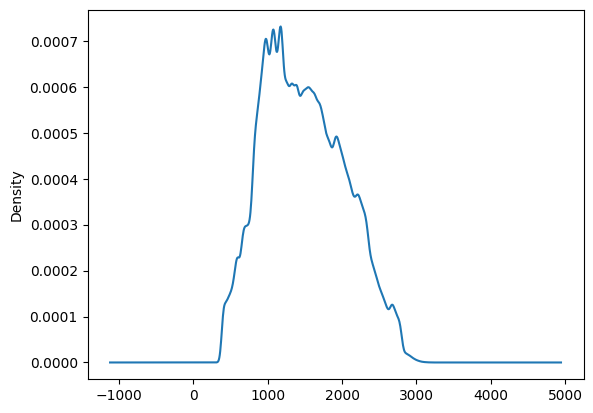

In [ ]:
df['Rating'].plot.kde()

### **Alternative hypothesis:** There are certain themes more commonly present in puzzles rated >=2000 than in lower-rated ones.

Finding unique theme words

In [ ]:
unique_words = set()
for theme in df['Themes']:
    for word in str(theme).split(" "):
        unique_words.add(word)

unique_words

{'advancedPawn',
 'advantage',
 'anastasiaMate',
 'arabianMate',
 'attackingF2F7',
 'attraction',
 'backRankMate',
 'bishopEndgame',
 'bodenMate',
 'capturingDefender',
 'castling',
 'clearance',
 'crushing',
 'defensiveMove',
 'deflection',
 'discoveredAttack',
 'doubleBishopMate',
 'doubleCheck',
 'dovetailMate',
 'enPassant',
 'endgame',
 'equality',
 'exposedKing',
 'fork',
 'hangingPiece',
 'hookMate',
 'interference',
 'intermezzo',
 'killBoxMate',
 'kingsideAttack',
 'knightEndgame',
 'long',
 'master',
 'masterVsMaster',
 'mate',
 'mateIn1',
 'mateIn2',
 'mateIn3',
 'mateIn4',
 'mateIn5',
 'middlegame',
 'oneMove',
 'opening',
 'pawnEndgame',
 'pin',
 'promotion',
 'queenEndgame',
 'queenRookEndgame',
 'queensideAttack',
 'quietMove',
 'rookEndgame',
 'sacrifice',
 'short',
 'skewer',
 'smotheredMate',
 'superGM',
 'trappedPiece',
 'underPromotion',
 'veryLong',
 'vukovicMate',
 'xRayAttack',
 'zugzwang'}

Finding frequency distribution of themes in higher-rated puzzles

In [ ]:
high_rated_puzzles = df[df['Rating'] >= 2000]

# initialize pd.DataFrame

counts_themes_high_rated = pd.DataFrame(columns=['Frequency'], index=list(unique_words))

# assign mean rating by theme

for word in unique_words:
    filtered_df = high_rated_puzzles[high_rated_puzzles['Themes'].str.contains(word, na=False)]
    counts_themes_high_rated.loc[word, 'Frequency'] = len(filtered_df) / len(high_rated_puzzles)

counts_themes_high_rated.head()

,Frequency
queensideAttack,0.010856
middlegame,0.486787
vukovicMate,0.000112
castling,0.00182
advantage,0.384399


Finding frequency distribution of theme words in higher-rated puzzles

In [ ]:
low_rated_puzzles = df[df['Rating'] < 2000]

# initialize pd.DataFrame

counts_themes_low_rated = pd.DataFrame(columns=['Frequency'], index=list(unique_words))

# assign mean rating by theme

for word in unique_words:
    filtered_df = low_rated_puzzles[low_rated_puzzles['Themes'].str.contains(word, na=False)]
    counts_themes_low_rated.loc[word, 'Frequency'] = len(filtered_df) / len(low_rated_puzzles)

counts_themes_low_rated.head()

,Frequency
queensideAttack,0.015623
middlegame,0.450107
vukovicMate,0.00041
castling,0.0001
advantage,0.269067


Comparing counts using a grouped bar graph

In [ ]:
counts_themes_high_rated['RatingGroup'] = 'High'
counts_themes_low_rated['RatingGroup'] = 'Low'

counts_themes_high_rated = counts_themes_high_rated.reset_index()
counts_themes_low_rated = counts_themes_low_rated.reset_index()

counts_themes_high_rated = counts_themes_high_rated.rename(columns={'index': 'Theme'})
counts_themes_low_rated = counts_themes_low_rated.rename(columns={'index': 'Theme'})

combined_counts_themes = pd.concat([counts_themes_high_rated, counts_themes_low_rated], ignore_index=True)

combined_counts_themes.head()

,Theme,Frequency,RatingGroup
0,queensideAttack,0.010856,High
1,middlegame,0.486787,High
2,vukovicMate,0.000112,High
3,castling,0.00182,High
4,advantage,0.384399,High


### Results

Text(0.5, 1.0, 'Frequency Distributions of Themes in High and Low Rated Groups')

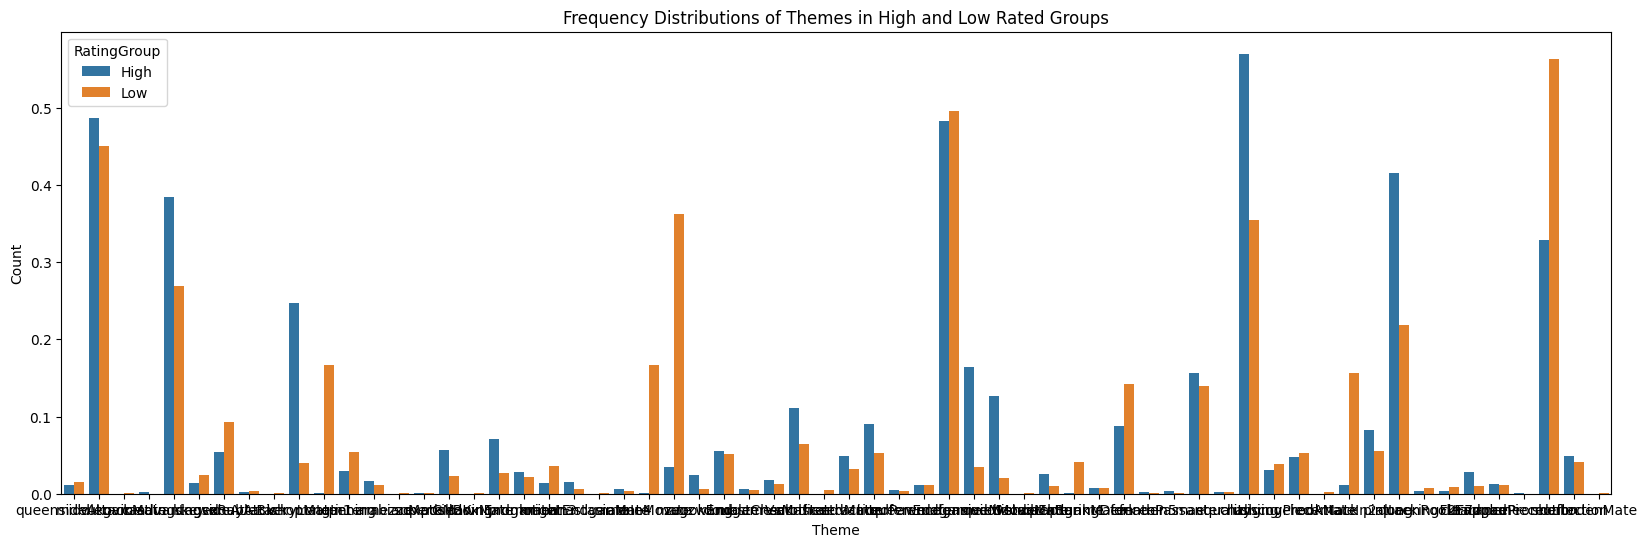

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes, ax=ax)
ax.set_xlabel('Theme')
ax.set_ylabel('Count')
ax.set_title('Frequency Distributions of Themes in High and Low Rated Groups')

/tmp/ipython-input-100-2271888901.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(combined_counts_themes_quarter1['Theme'], rotation=45, ha='right')
/tmp/ipython-input-100-2271888901.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(combined_counts_themes_quarter2['Theme'], rotation=45, ha='right')
/tmp/ipython-input-100-2271888901.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(combined_counts_themes_quarter3['Theme'], rotation=45, ha='right')
/tmp/ipython-input-100-2271888901.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(combined_counts_the

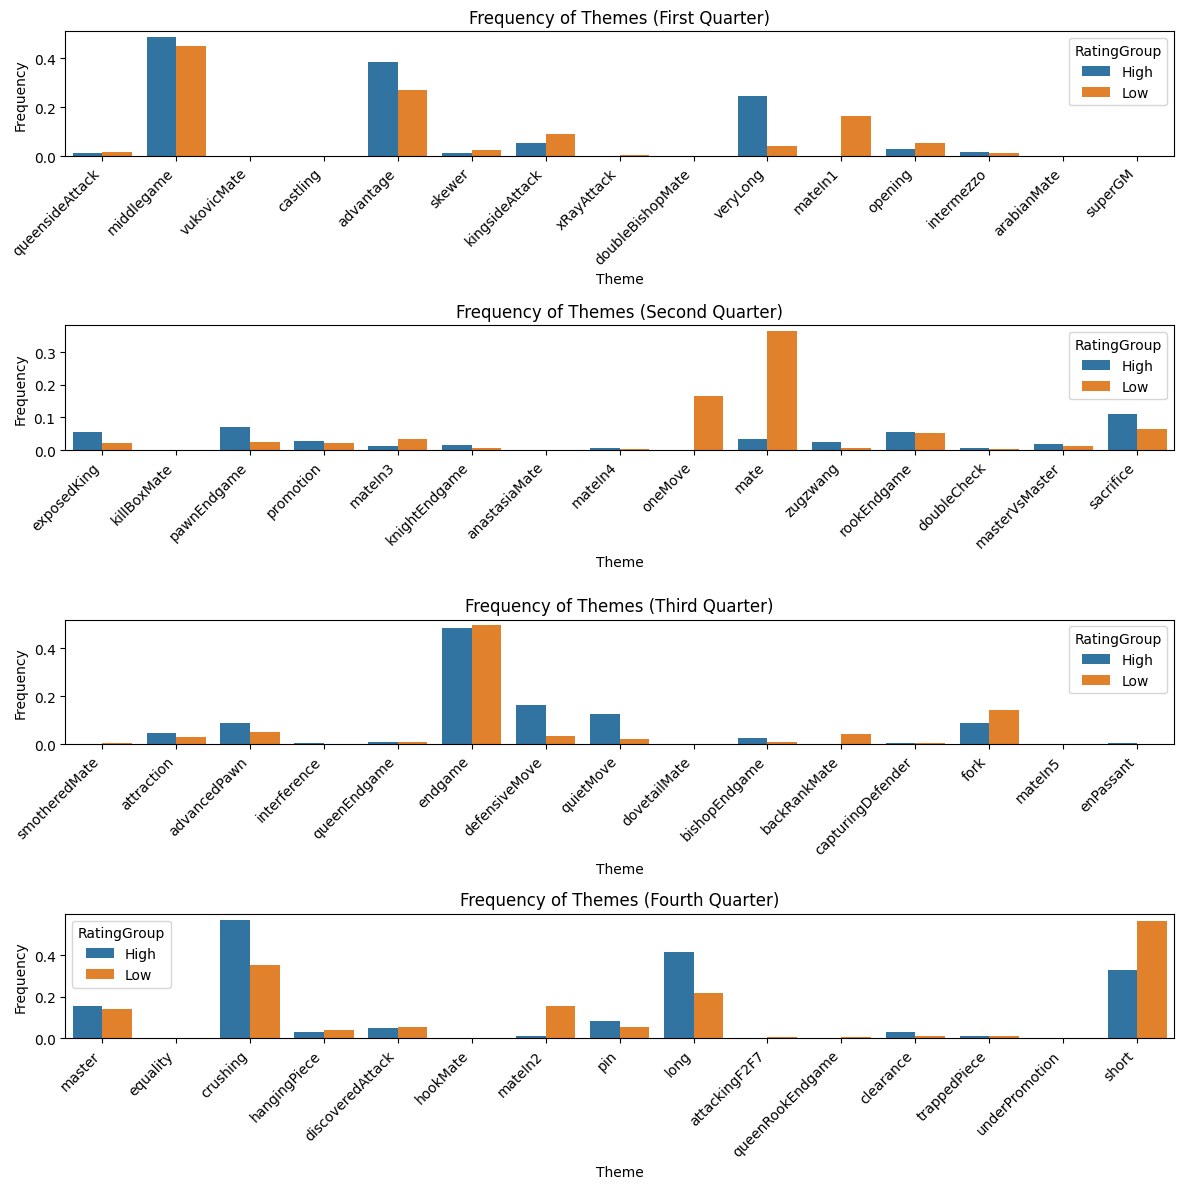

In [ ]:
# splitting the combined counts of themes between into dataframes
# since a single grouped bar graph for the combined counts of themes is overcrowded on the x-axis

themes = combined_counts_themes['Theme'].unique()
quarter_length = len(themes) // 4
themes_quarter1 = themes[:quarter_length]
themes_quarter2 = themes[quarter_length:quarter_length*2]
themes_quarter3 = themes[quarter_length*2:quarter_length*3]
themes_quarter4 = themes[quarter_length*3:quarter_length*4]

combined_counts_themes_quarter1 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter1)]
combined_counts_themes_quarter2 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter2)]
combined_counts_themes_quarter3 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter3)]
combined_counts_themes_quarter4 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter4)]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter1, ax=axes[0])
axes[0].set_title('Frequency of Themes (First Quarter)')
axes[0].set_xticklabels(combined_counts_themes_quarter1['Theme'], rotation=45, ha='right')

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter2, ax=axes[1])
axes[1].set_title('Frequency of Themes (Second Quarter)')
axes[1].set_xticklabels(combined_counts_themes_quarter2['Theme'], rotation=45, ha='right')

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter3, ax=axes[2])
axes[2].set_title('Frequency of Themes (Third Quarter)')
axes[2].set_xticklabels(combined_counts_themes_quarter3['Theme'], rotation=45, ha='right')

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter4, ax=axes[3])
axes[3].set_title('Frequency of Themes (Fourth Quarter)')
axes[3].set_xticklabels(combined_counts_themes_quarter4['Theme'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

Automating identification of theme words significantly more likely to be present in high-rated puzzles than in low-rated puzzles

---



In [ ]:
# If frequency of a theme word in high-rated puzzles is at least 2 times that in low-rated puzzles,
# it is said to be significantly more likely to be present in high-rated puzzles than in low-rated puzzles.

significantly_more_likely_in_high_rated = []

for word in unique_words:
  high_freq = counts_themes_high_rated[counts_themes_high_rated['Theme'] == word]['Frequency'].iloc[0]
  low_freq = counts_themes_low_rated[counts_themes_low_rated['Theme'] == word]['Frequency'].iloc[0]

  if high_freq >= 1.5 * low_freq:
    significantly_more_likely_in_high_rated.append(word)

print(significantly_more_likely_in_high_rated)
print(len(significantly_more_likely_in_high_rated))

['castling', 'veryLong', 'intermezzo', 'superGM', 'exposedKing', 'pawnEndgame', 'knightEndgame', 'mateIn4', 'zugzwang', 'sacrifice', 'advancedPawn', 'interference', 'defensiveMove', 'quietMove', 'bishopEndgame', 'mateIn5', 'enPassant', 'crushing', 'long', 'clearance', 'underPromotion']
21


### **Conclusion:** It appears there are 21 theme words significantly more likely to be present in puzzles rated >=2000 than in lower-rated puzzles including 'interference' and 'sacrifice.'

Players trying to cross the 2000 rating should try to look for moves aligned with these theme words.